# Informes

Vamos a experimentar un poco qué tipo de informes podemos generar. Tendré que crear una plantilla con suficientes entradas para poder generar informes. Pero lo puedo hacer más adelante, de momento puedo utilizar las plantillas que ya tengo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [12]:
# creo una función para cargar la plantilla, con los parámetros adecuados
def load_plantilla(file='plantilla_informes.xlsx'):
    cuentas = pd.read_excel(file, sheet_name='cuentas', usecols='f:h', header=3)
    cuentas.columns=['num', 'nombre', 'tipo']
    simple = pd.read_excel(file, sheet_name='simple', usecols='b:f', parse_dates=[1], header=2)
    compleja = pd.read_excel(file, sheet_name='compleja', usecols='b:g', parse_dates=[2], header=2)

    last = len(compleja)
    asiento = compleja.id.max()
    for line in range(len(simple)):
        compleja.loc[last + 2*line, 'id'] = line + asiento + 1
        compleja.loc[last + 2*line+1, 'id'] = line + asiento + 1
        compleja.loc[last + 2*line, 'Fecha'] = simple.loc[line, 'Fecha']
        compleja.loc[last + 2*line+1, 'Fecha'] = simple.loc[line, 'Fecha']
        compleja.loc[last + 2*line, 'Descripción'] = simple.loc[line, 'Descripción']
        compleja.loc[last + 2*line+1, 'Descripción'] = simple.loc[line, 'Descripción']
        compleja.loc[last + 2*line, 'Debe'] = simple.loc[line, 'Valor']
        compleja.loc[last + 2*line, 'Haber'] = 0
        compleja.loc[last + 2*line, 'Cuenta'] = simple.loc[line, 'Debe']
        compleja.loc[last + 2*line+1, 'Debe'] = 0
        compleja.loc[last + 2*line+1, 'Haber'] = simple.loc[line, 'Valor']
        compleja.loc[last + 2*line+1, 'Cuenta'] = simple.loc[line, 'Haber']
        
    return compleja, cuentas

In [13]:
movimientos, cuentas = load_plantilla()
movimientos.sample(5)

,id,Fecha,Descripción,Debe,Haber,Cuenta
84,31.0,2022-01-18,Cervezas con amigos,0.00,14.00,310.0
442,210.0,2022-10-16,Gasolina coche,0.00,80.00,324.0
130,54.0,2022-02-18,Compras Amazon,0.00,88.16,343.0
269,124.0,2022-06-05,Compra super,100.19,0.00,1200.0
427,203.0,2022-10-07,Pizzas Telepizza,30.60,0.00,100.0


In [14]:
movimientos[movimientos.Cuenta==100].sample(5)

,id,Fecha,Descripción,Debe,Haber,Cuenta
337,158.0,2022-07-28,Cervezas con amigos,15.34,0.0,100.0
145,62.0,2022-03-04,Pizzas Telepizza,31.56,0.0,100.0
193,86.0,2022-04-08,Pizzas Telepizza,30.36,0.0,100.0
315,147.0,2022-07-12,Cervezas con amigos,19.17,0.0,100.0
521,250.0,2022-12-19,Cervezas con amigos,15.01,0.0,100.0


In [15]:
cuentas.sample(5)

,num,nombre,tipo
16,2004,Seguro casa,"gastos, casa"
23,204,Jardín casa,"gastos, casa"
25,300,Comida,gastos
3,1110,Cuenta ahorro,balance
42,43,Otros ingresos,ingresos


In [16]:
merged = movimientos.merge(cuentas, left_on='Cuenta', right_on='num').drop(columns='num')
merged.sample(5)

,id,Fecha,Descripción,Debe,Haber,Cuenta,nombre,tipo
283,224.0,2022-11-06,Compra super,120.61,0.00,1200.0,Tarjeta Visa,balance
0,1.0,2022-01-01,Saldo inicial,0.00,200.00,100.0,Caja,balance
337,154.0,2022-07-22,Pizzas Telepizza,0.00,24.36,312.0,"Comidas, cenas…",gastos
368,17.0,2022-05-20,Factura EDP - gas,0.00,120.00,2001.0,Gas casa,"gastos, casa"
39,110.0,2022-05-18,Sacar dinero,0.00,500.00,100.0,Caja,balance


In [17]:
debe = merged.groupby('nombre').Debe.sum()
haber = merged.groupby('nombre').Haber.sum()
total = haber - debe
total = total.rename('Total')
df = pd.DataFrame(data = [debe, haber, total]).transpose()
df

,Debe,Haber,Total
nombre,,,
Ajustes,0.00,92300.00,92300.00
Caja,1750.55,6257.65,4507.10
Comida,0.00,5379.61,5379.61
"Comidas, cenas…",0.00,2334.83,2334.83
"Comisiones, intereses",0.00,4725.00,4725.00
Cuenta ahorro,0.00,5000.00,5000.00
Cuenta nómina,21774.00,32000.00,10226.00
Deportes,0.00,43.00,43.00
Donaciones,0.00,240.00,240.00


In [18]:
hipoteca = merged[merged.nombre=='Hipoteca']
hipoteca

,id,Fecha,Descripción,Debe,Haber,Cuenta,nombre,tipo
171,1.0,2022-01-01,Saldo inicial,100000.0,0.000000,150.0,Hipoteca,gastos
172,4.0,2022-01-30,Pago hipoteca,0.0,583.333333,150.0,Hipoteca,gastos
173,5.0,2022-02-28,Pago hipoteca,0.0,587.500000,150.0,Hipoteca,gastos
174,6.0,2022-03-30,Pago hipoteca,0.0,591.666667,150.0,Hipoteca,gastos
175,7.0,2022-04-30,Pago hipoteca,0.0,595.833333,150.0,Hipoteca,gastos
176,8.0,2022-05-30,Pago hipoteca,0.0,600.000000,150.0,Hipoteca,gastos
177,9.0,2022-06-30,Pago hipoteca,0.0,604.166667,150.0,Hipoteca,gastos
178,10.0,2022-07-30,Pago hipoteca,0.0,608.333333,150.0,Hipoteca,gastos
179,11.0,2022-08-30,Pago hipoteca,0.0,612.500000,150.0,Hipoteca,gastos
180,12.0,2022-09-30,Pago hipoteca,0.0,616.666667,150.0,Hipoteca,gastos


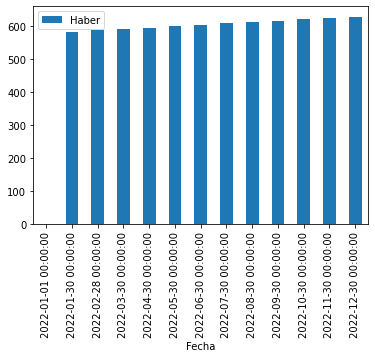

In [19]:
hipoteca.plot.bar(x='Fecha', y='Haber')

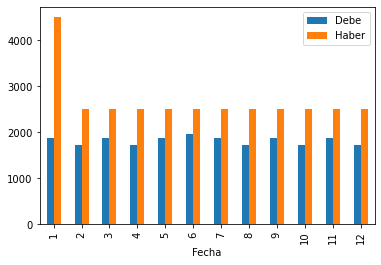

In [20]:
nomina = merged[merged.nombre=='Cuenta nómina']
nomina.groupby(nomina.Fecha.dt.month)[['Debe', 'Haber']].sum().plot.bar()

In [21]:
data = nomina.groupby(nomina.Fecha.dt.month)[['Debe', 'Haber']].sum()
data

,Debe,Haber
Fecha,,
1,1870.0,4500.0
2,1720.0,2500.0
3,1870.0,2500.0
4,1720.0,2500.0
5,1870.0,2500.0
6,1954.0,2500.0
7,1870.0,2500.0
8,1720.0,2500.0
9,1870.0,2500.0


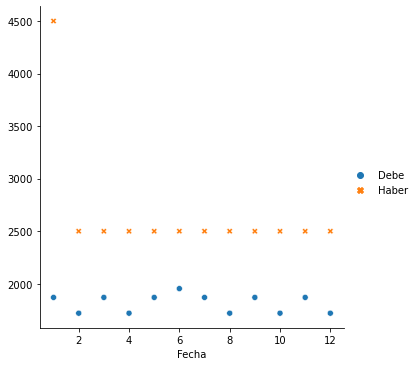

In [22]:
sns.relplot(data=data)

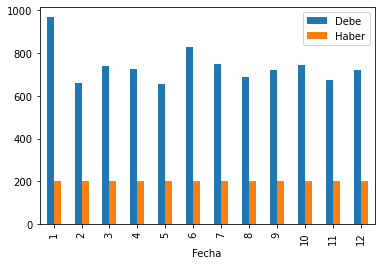

In [23]:
merged[merged.nombre=='Tarjeta Visa'].groupby(merged.Fecha.dt.month)[['Debe', 'Haber']].sum().plot.bar()

In [24]:
merged.head()

,id,Fecha,Descripción,Debe,Haber,Cuenta,nombre,tipo
0,1.0,2022-01-01,Saldo inicial,0.00,200.00,100.0,Caja,balance
1,2.0,2022-12-03,Cena en el restaurante propina,3.00,0.00,100.0,Caja,balance
2,21.0,2022-01-01,Intereses,0.00,5.31,100.0,Caja,balance
3,22.0,2022-01-02,Pizzas Telepizza,32.76,0.00,100.0,Caja,balance
4,25.0,2022-01-11,Compra pan,2.54,0.00,100.0,Caja,balance


In [25]:
new = merged.set_index('Fecha')

In [26]:
new

,id,Descripción,Debe,Haber,Cuenta,nombre,tipo
Fecha,,,,,,,
2022-01-01,1.0,Saldo inicial,0.00,200.00,100.0,Caja,balance
2022-12-03,2.0,Cena en el restaurante propina,3.00,0.00,100.0,Caja,balance
2022-01-01,21.0,Intereses,0.00,5.31,100.0,Caja,balance
2022-01-02,22.0,Pizzas Telepizza,32.76,0.00,100.0,Caja,balance
2022-01-11,25.0,Compra pan,2.54,0.00,100.0,Caja,balance
...,...,...,...,...,...,...,...
2022-09-25,197.0,Nómina,2500.00,0.00,400.0,Nómina,ingresos
2022-10-25,215.0,Nómina,2500.00,0.00,400.0,Nómina,ingresos
2022-11-25,233.0,Nómina,2500.00,0.00,400.0,Nómina,ingresos


In [46]:
gastos = new[new.tipo=='gastos'].resample('M').sum().drop(columns=['id', 'Cuenta'])
gastos

,Debe,Haber
Fecha,,
2022-01-31,100000.0,2063.02
2022-02-28,0.0,1816.36
2022-03-31,0.0,1896.98
2022-04-30,0.0,1908.02
2022-05-31,0.0,1814.04
2022-06-30,0.0,1988.82
2022-07-31,0.0,1937.65
2022-08-31,0.0,1840.95
2022-09-30,0.0,1902.46


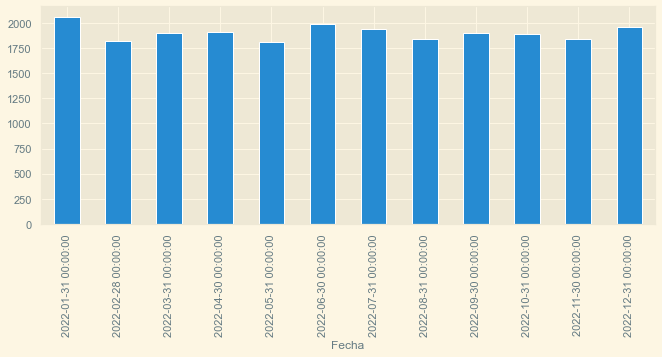

In [47]:
gastos.Haber.plot.bar()

Text(0, 0.5, 'euros')

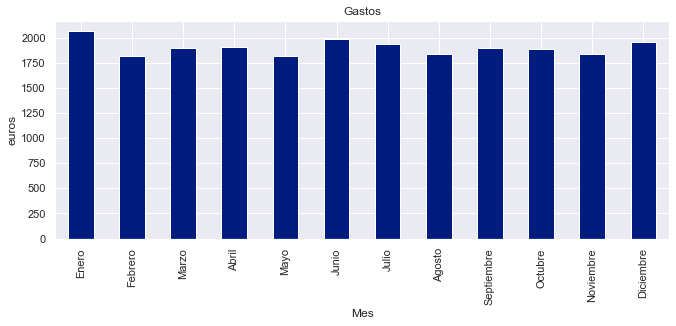

In [48]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
sns.set_theme(palette='dark', rc={'figure.figsize':(11, 4)})
fig, ax = plt.subplots()  # Create a figure and an axes.
gastos.Haber.plot.bar(xlabel='Mes', ax=ax)
ax.set_xticklabels(meses)
ax.set_title('Gastos')
ax.set_xlabel('Mes')
ax.set_ylabel('euros')

Text(0, 0.5, 'euros')

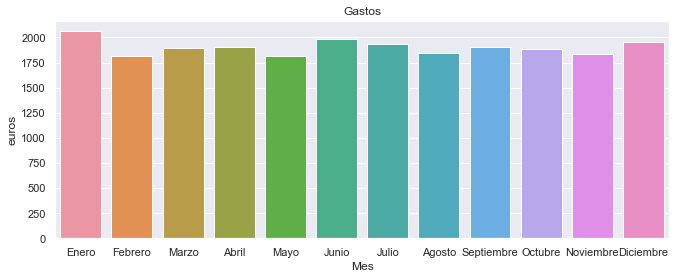

In [49]:
fig, ax = plt.subplots()  # Create a figure and an axes.
sns.barplot(y=gastos.Haber, x=gastos.index, ax=ax)
ax.set_xticklabels(meses)
ax.set_title('Gastos')
ax.set_xlabel('Mes')
ax.set_ylabel('euros')

Text(0, 0.5, 'euros')

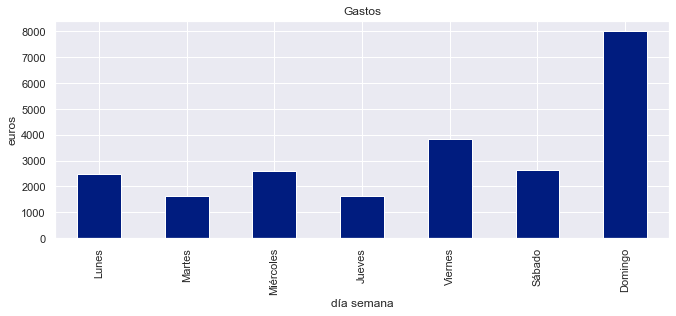

In [58]:
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
fig, ax = plt.subplots()  # Create a figure and an axes.
gastos2 = merged[merged.tipo=='gastos'].groupby(merged.Fecha.dt.weekday).sum()
gastos2.Haber.plot.bar()
ax.set_xticklabels(dias_semana)
ax.set_title('Gastos')
ax.set_xlabel('día semana')
ax.set_ylabel('euros')

Text(0, 0.5, 'euros')

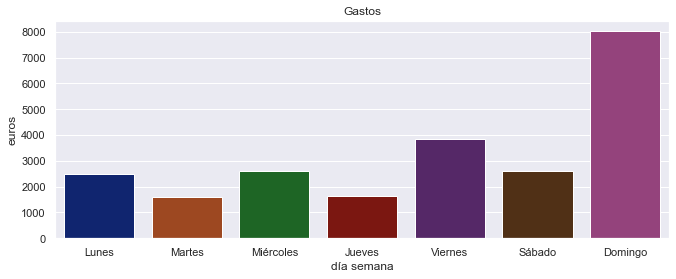

In [59]:
fig, ax = plt.subplots()  # Create a figure and an axes.
sns.barplot(y=gastos2.Haber, x=gastos2.index, ax=ax)
ax.set_xticklabels(dias_semana)
ax.set_title('Gastos')
ax.set_xlabel('día semana')
ax.set_ylabel('euros')

In [62]:
gastos = merged[merged.tipo=='gastos'].groupby(merged.Fecha.dt.month).sum().drop(columns=['id', 'Cuenta'])
gastos.index.rename('Mes', inplace=True)
gastos.index=meses
gastos

,Debe,Haber
Enero,100000.0,2063.02
Febrero,0.0,1816.36
Marzo,0.0,1896.98
Abril,0.0,1908.02
Mayo,0.0,1814.04
Junio,0.0,1988.82
Julio,0.0,1937.65
Agosto,0.0,1840.95
Septiembre,0.0,1902.46
Octubre,0.0,1888.30


In [63]:
trimestres = ['1ro', '2do', '3ro', '4to']
ingresos = merged[merged.tipo=='ingresos'].groupby(merged.Fecha.dt.quarter).sum().drop(columns=['id', 'Cuenta'])
ingresos.index.rename('Mes', inplace=True)
ingresos.index=trimestres
ingresos

,Debe,Haber
1ro,7514.86,0.0
2do,7515.64,0.0
3ro,7514.01,0.0
4to,7513.14,0.0


In [64]:
df = merged[merged.tipo=='gastos'].groupby(merged.Fecha.dt.quarter).sum().drop(columns=['id', 'Cuenta'])
df

,Debe,Haber
Fecha,,
1,100000.0,5776.36
2,0.0,5710.88
3,0.0,5681.06
4,0.0,5685.22


In [65]:
df.Haber.sum()

22853.52

In [66]:
df.reset_index(inplace=True)

In [67]:
df.Fecha = [ trimestres[m-1] for m in df.Fecha ]

In [68]:
df['Total'] = df.Haber - df.Debe
df

,Fecha,Debe,Haber,Total
0,1ro,100000.0,5776.36,-94223.64
1,2do,0.0,5710.88,5710.88
2,3ro,0.0,5681.06,5681.06
3,4to,0.0,5685.22,5685.22


Text(0, 0.5, 'euros')

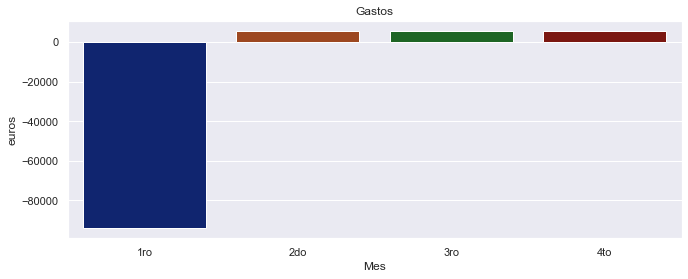

In [69]:
fig, ax = plt.subplots()  # Create a figure and an axes.
sns.barplot(y=df.Total, x=df.Fecha, ax=ax)
ax.set_title('Gastos')
ax.set_xlabel('Mes')
ax.set_ylabel('euros')

In [70]:
df.Fecha

0    1ro
1    2do
2    3ro
3    4to
Name: Fecha, dtype: object

In [71]:
col = df.columns[0]
df[col]

0    1ro
1    2do
2    3ro
3    4to
Name: Fecha, dtype: object

In [72]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'euros')

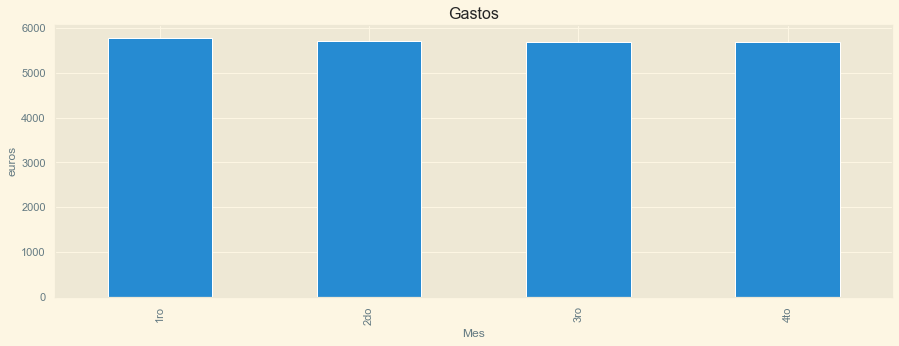

In [73]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(15,5))  # Create a figure and an axes.
df.Haber.plot.bar()
ax.set_xticklabels(df.Fecha)
ax.set_title('Gastos')
ax.set_xlabel('Mes')
ax.set_ylabel('euros')

In [74]:
df

,Fecha,Debe,Haber,Total
0,1ro,100000.0,5776.36,-94223.64
1,2do,0.0,5710.88,5710.88
2,3ro,0.0,5681.06,5681.06
3,4to,0.0,5685.22,5685.22


In [89]:
import datetime
mask = merged.Fecha < '2022-01-07'
diario = merged[mask].groupby(merged.Fecha.dt.day).sum().drop(columns=['id', 'Cuenta'])
diario.Fecha = diario.Fecha.dt.date
diario

,Debe,Haber
Fecha,,
1,100005.31,100005.31
2,32.76,32.76
3,70.00,70.00
5,50.00,0.00


,id,Fecha,Descripción,Debe,Haber,Cuenta,nombre,tipo
0,1.0,2022-01-01,Saldo inicial,0.00,200.00,100.0,Caja,balance
1,2.0,2022-12-03,Cena en el restaurante propina,3.00,0.00,100.0,Caja,balance
2,21.0,2022-01-01,Intereses,0.00,5.31,100.0,Caja,balance
3,22.0,2022-01-02,Pizzas Telepizza,32.76,0.00,100.0,Caja,balance
4,25.0,2022-01-11,Compra pan,2.54,0.00,100.0,Caja,balance
...,...,...,...,...,...,...,...,...
536,197.0,2022-09-25,Nómina,2500.00,0.00,400.0,Nómina,ingresos
537,215.0,2022-10-25,Nómina,2500.00,0.00,400.0,Nómina,ingresos
538,233.0,2022-11-25,Nómina,2500.00,0.00,400.0,Nómina,ingresos
539,255.0,2022-12-25,Nómina,2500.00,0.00,400.0,Nómina,ingresos
